In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from netCDF4 import Dataset

plt.rcParams["font.size"] = 12

In [2]:
winter_data = Dataset("../data/2022_winter.nc")
spring_data = Dataset("../data/2022_spring.nc")
summer_data = Dataset("../data/2022_summer.nc")
autumn_data = Dataset("../data/2022_autumn.nc")

In [3]:
def get_data(data, season):
    """Function to retrieve coordinates, temperature anomaly and average temperature anomaly data for each season."""
    
    #from -180 to 180 degree East
    globals()[f"{season}_lons"] = data.variables["lon"][:]

    #from -90 to 90 degree North
    globals()[f"{season}_lats"] = data.variables["lat"][:]
    
    globals()[f"{season}_temp_anomaly"] = data.variables["TEMPANOMALY"][:]
    
    globals()[f"{season}_temp_anomaly_mean"] = round(data.variables["TEMPANOMALY"][:].reshape(-1, 1).mean(), 2)

    return globals()[f"{season}_lons"], globals()[f"{season}_lats"], globals()[f"{season}_temp_anomaly"]

In [4]:
get_data(winter_data, "winter")
get_data(spring_data, "spring")
get_data(summer_data, "summer")
get_data(autumn_data, "autumn")

(masked_array(data=[-179., -177., -175., -173., -171., -169., -167., -165.,
                    -163., -161., -159., -157., -155., -153., -151., -149.,
                    -147., -145., -143., -141., -139., -137., -135., -133.,
                    -131., -129., -127., -125., -123., -121., -119., -117.,
                    -115., -113., -111., -109., -107., -105., -103., -101.,
                     -99.,  -97.,  -95.,  -93.,  -91.,  -89.,  -87.,  -85.,
                     -83.,  -81.,  -79.,  -77.,  -75.,  -73.,  -71.,  -69.,
                     -67.,  -65.,  -63.,  -61.,  -59.,  -57.,  -55.,  -53.,
                     -51.,  -49.,  -47.,  -45.,  -43.,  -41.,  -39.,  -37.,
                     -35.,  -33.,  -31.,  -29.,  -27.,  -25.,  -23.,  -21.,
                     -19.,  -17.,  -15.,  -13.,  -11.,   -9.,   -7.,   -5.,
                      -3.,   -1.,    1.,    3.,    5.,    7.,    9.,   11.,
                      13.,   15.,   17.,   19.,   21.,   23.,   25.,   27.,
            

In [5]:
print (winter_lons.shape, winter_lats.shape, winter_temp_anomaly.shape)

(180,) (90,) (90, 180)


In [6]:
print (spring_lons.shape, spring_lats.shape, spring_temp_anomaly.shape)

(180,) (90,) (90, 180)


In [7]:
winter_temp_anomaly_mean

1.08

In [8]:
title = "Global seasonal temperature anomaly (°C) for 2022 relative to 1951-80 mean"

### Global temperature anomaly in different seasons

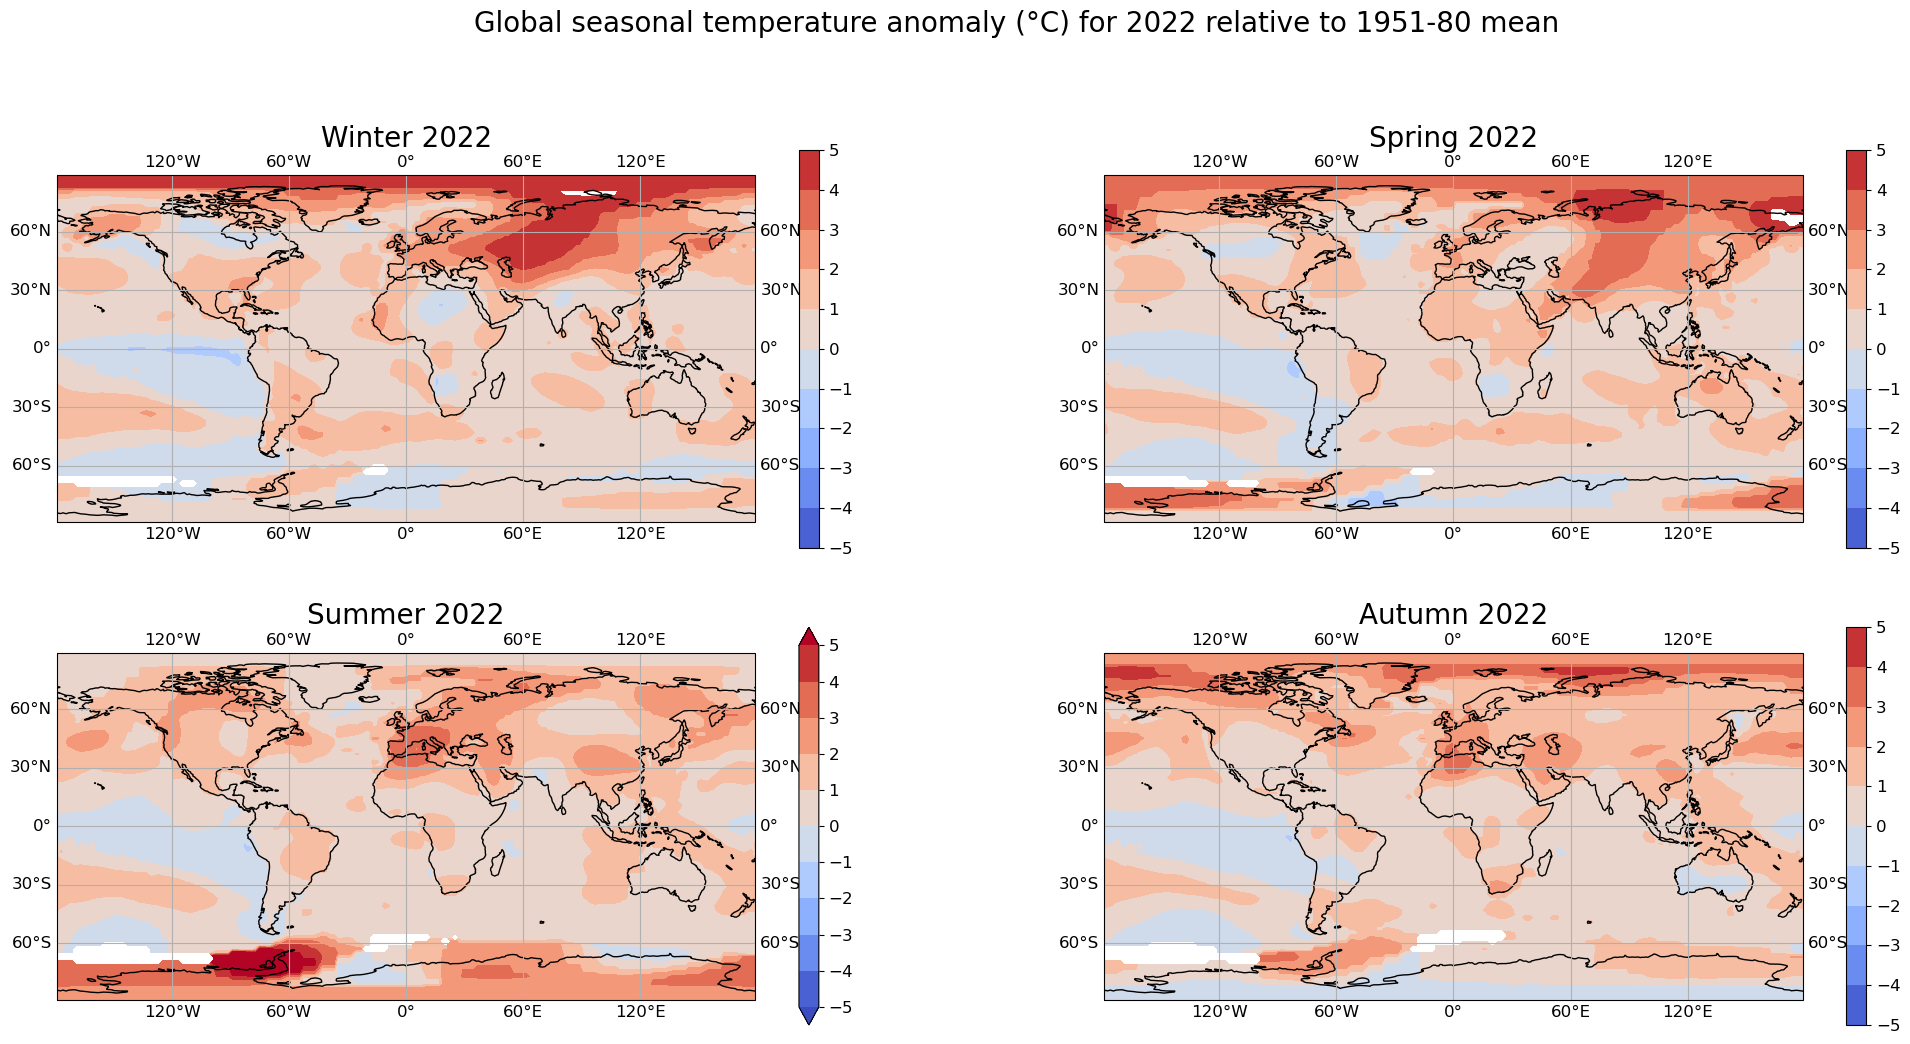

In [9]:
clevs = np.arange(-5, 6)
cmap = "coolwarm"
projection = ccrs.PlateCarree()

# Use subplot_kw to declare the projection
fig, axs = plt.subplots(2, 2, figsize = (24, 7), subplot_kw = {"projection": projection},
                        #gridspec_kw = {'wspace':0.1, 'hspace':0.3}
                       )
plt.subplots_adjust(left = 0.1, right = 0.9, top = 1, bottom = -0.25)

fig.suptitle(title, x = 0.5, y = 1.2, fontsize = 20)


cf1 = axs[0, 0].contourf(winter_lons, winter_lats, 
             winter_temp_anomaly,
             clevs,
             #transform = ccrs.PlateCarree(),
             cmap = cmap
            )
fig.colorbar(cf1, ax=axs[0, 0], ticks = clevs)

axs[0, 0].set_title('Winter 2022', fontsize = 20)
axs[0, 0].coastlines()
axs[0, 0].gridlines(draw_labels=True)
axs[0, 0].set_aspect('equal', adjustable=None)



cf2 = axs[0, 1].contourf(spring_lons, spring_lats, 
             spring_temp_anomaly,
             clevs,
             #transform = ccrs.PlateCarree(),
             cmap = cmap
            )
fig.colorbar(cf2, ax=axs[0, 1], ticks = clevs)
axs[0, 1].set_title('Spring 2022', fontsize = 20)
axs[0, 1].coastlines()
axs[0, 1].gridlines(draw_labels=True)
axs[0, 1].set_aspect('equal', adjustable=None)


cf3 = axs[1, 0].contourf(summer_lons, summer_lats, 
             summer_temp_anomaly,
             clevs,
             #transform = ccrs.PlateCarree(),
             cmap = cmap,
                         extend = "both"
            )
fig.colorbar(cf3, ax=axs[1, 0], ticks = clevs)
axs[1, 0].set_title('Summer 2022', fontsize = 20)
axs[1, 0].coastlines()
axs[1, 0].gridlines(draw_labels=True)
axs[1, 0].set_aspect('equal', adjustable=None)


cf4 = axs[1, 1].contourf(autumn_lons, autumn_lats, 
             autumn_temp_anomaly,
            clevs,
             transform = ccrs.PlateCarree(),
             cmap = cmap
            )
fig.colorbar(cf4, ax=axs[1, 1], ticks = np.arange(-5, 6))

axs[1, 1].set_title('Autumn 2022', fontsize = 20)
axs[1, 1].coastlines()
axs[1, 1].gridlines(draw_labels=True)
axs[1, 1].set_aspect('equal', adjustable=None)



plt.show()

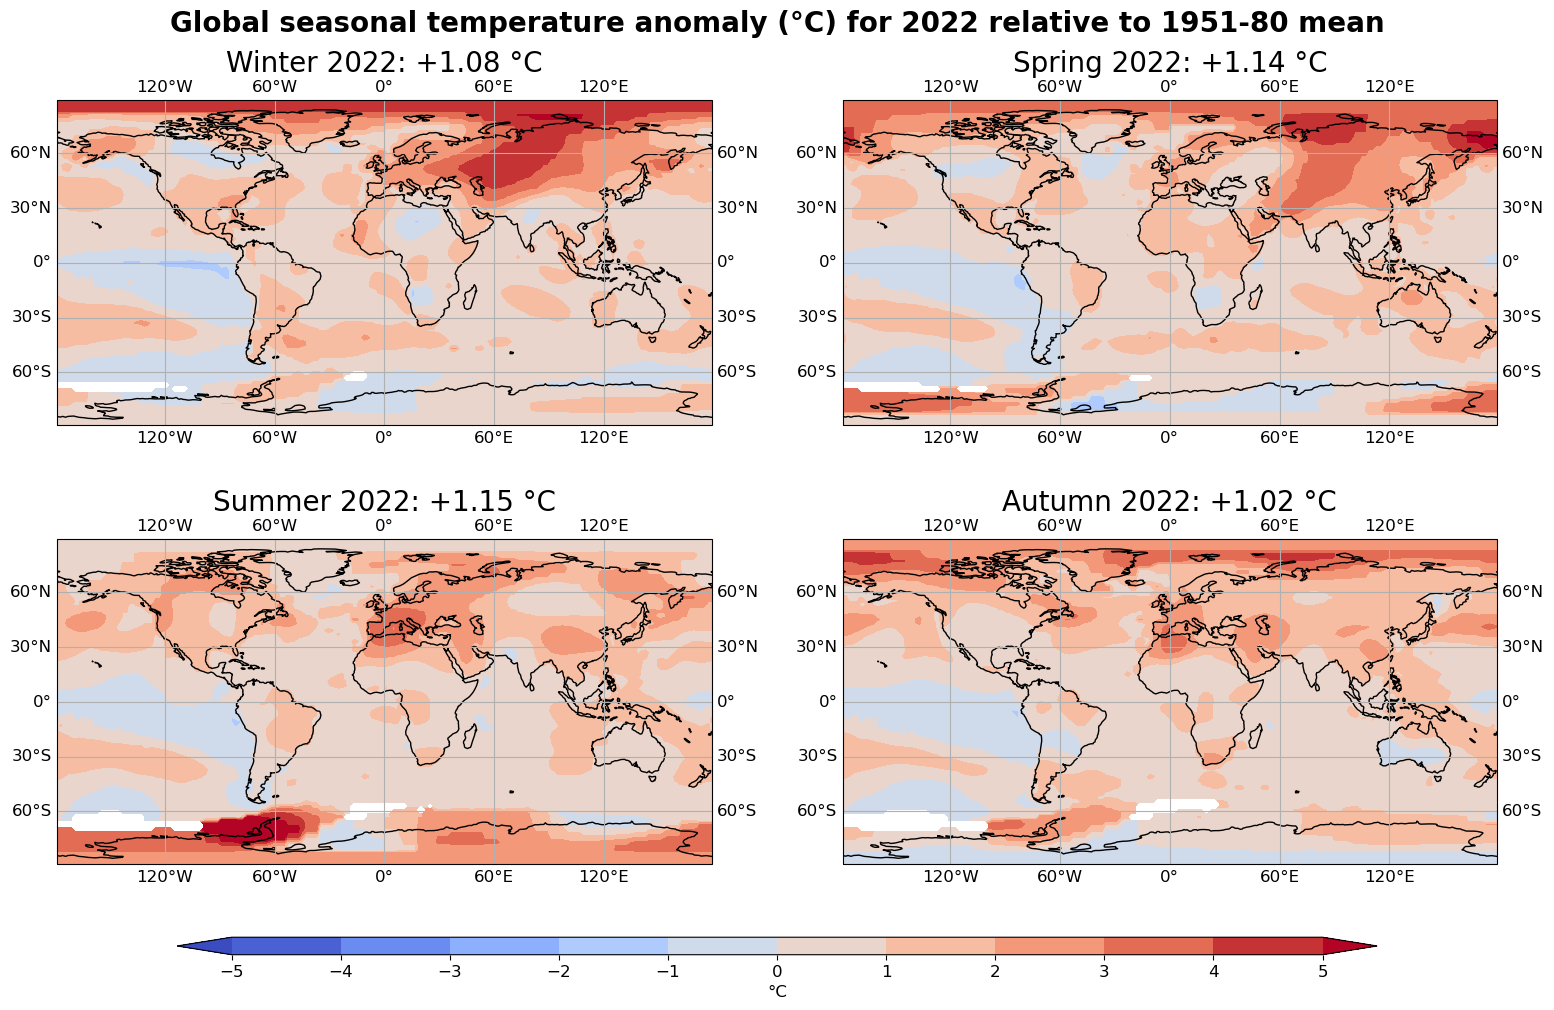

In [10]:
clevs = np.arange(-5, 6)
cmap = "coolwarm"
projection = ccrs.PlateCarree()

# Use subplot_kw to declare the projection
fig, axs = plt.subplots(2, 2, figsize = (24, 7), subplot_kw = {"projection": projection},
                        #gridspec_kw = {'wspace':0.01, 'hspace':0.3}
                       )
plt.subplots_adjust(left = 0.2, right = 0.8, top = 0.9, bottom = -0.25)

fig.suptitle(title, x = 0.5, y = 1, fontsize = 20, fontweight = "bold")


cf1 = axs[0, 0].contourf(winter_lons, winter_lats, 
             winter_temp_anomaly,
             clevs,
             #transform = ccrs.PlateCarree(),
             cmap = cmap,
                         extend = "both"
            )

axs[0, 0].set_title(f'Winter 2022: +{winter_temp_anomaly_mean} °C', fontsize = 20)
axs[0, 0].coastlines()
axs[0, 0].gridlines(draw_labels=True)
axs[0, 0].set_aspect('equal', adjustable=None)



cf2 = axs[0, 1].contourf(spring_lons, spring_lats, 
             spring_temp_anomaly,
             clevs,
             #transform = ccrs.PlateCarree(),
             cmap = cmap,
                         extend = "both"
            )
axs[0, 1].set_title(f'Spring 2022: +{spring_temp_anomaly_mean} °C', fontsize = 20)
axs[0, 1].coastlines()
axs[0, 1].gridlines(draw_labels=True)
axs[0, 1].set_aspect('equal', adjustable=None)


cf3 = axs[1, 0].contourf(summer_lons, summer_lats, 
             summer_temp_anomaly,
             clevs,
             #transform = ccrs.PlateCarree(),
             cmap = cmap,
                         extend = "both"
            )
axs[1, 0].set_title(f'Summer 2022: +{summer_temp_anomaly_mean} °C', fontsize = 20)
axs[1, 0].coastlines()
axs[1, 0].gridlines(draw_labels=True)
axs[1, 0].set_aspect('equal', adjustable=None)


cf4 = axs[1, 1].contourf(autumn_lons, autumn_lats, 
             autumn_temp_anomaly,
             clevs,
             #transform = ccrs.PlateCarree(),
             cmap = cmap,
                         
            #To add arrows in the colorbar
            extend = "both"
            )


cax = fig.add_axes([0.25, -0.35, 0.5, 0.025]) #[left, bottom, width, height]

lgd = fig.colorbar(cf4,
                   orientation = "horizontal",
                   ticks = clevs,
                   cax = cax,
                   label = "°C"
                  ).set_label("°C", rotation = 0)

axs[1, 1].set_title(f'Autumn 2022: +{autumn_temp_anomaly_mean} °C', fontsize = 20)
axs[1, 1].coastlines()
axs[1, 1].gridlines(draw_labels=True)
axs[1, 1].set_aspect('equal', adjustable=None)

plt.savefig("../output/temperature_anomalies_by_seasons.jpeg",
            bbox_inches = "tight",
           dpi = 300)

plt.show()

### Robinson projection

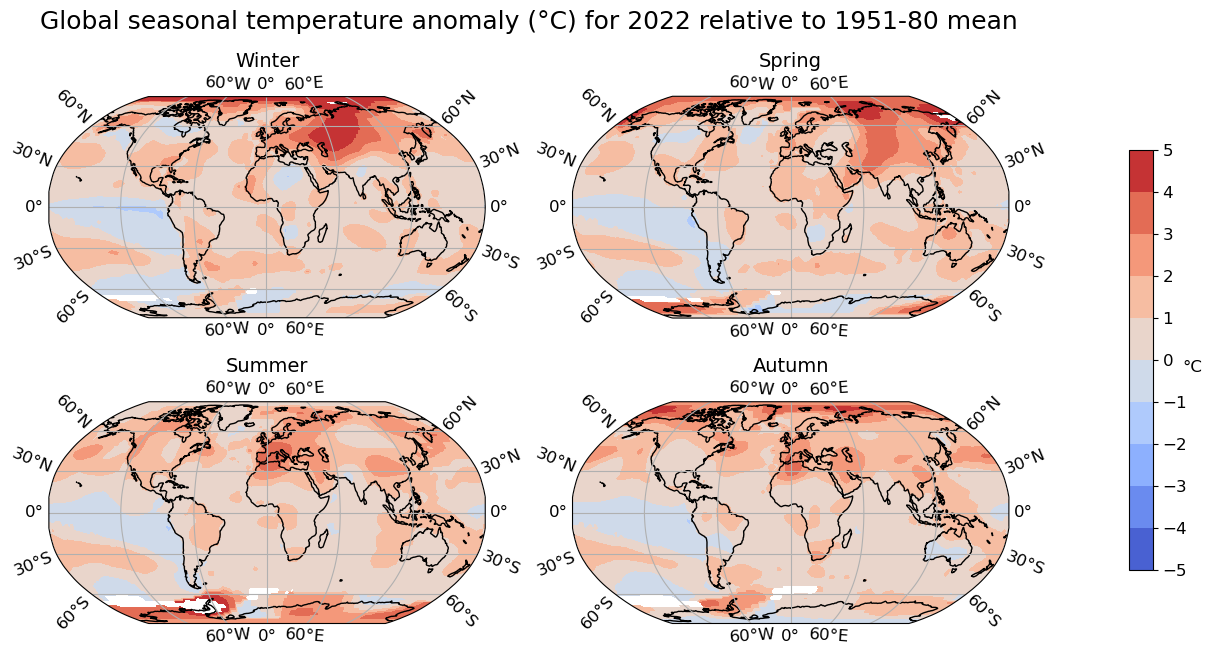

In [11]:
clevs = np.arange(-5, 6)
cmap = "coolwarm"
projection = ccrs.Robinson()

# Use subplot_kw to declare the projection
fig, axs = plt.subplots(2, 2, figsize = (24, 7), subplot_kw = {"projection": projection},
                       )
plt.subplots_adjust(left = 0.3, right = 0.7, top = 0.9, bottom = 0.1)
fig.suptitle(title, x = 0.5, y = 1, fontsize = 18)


cf1 = axs[0, 0].contourf(winter_lons, winter_lats, 
             winter_temp_anomaly,
             clevs,
             transform = ccrs.PlateCarree(),
             cmap = cmap
            )
#fig.colorbar(cf1, ax=axs[0, 0])

axs[0, 0].set_title('Winter', fontsize = 14)
axs[0, 0].coastlines()
axs[0, 0].gridlines(draw_labels=True)
axs[0, 0].set_aspect('equal', adjustable=None)



cf2 = axs[0, 1].contourf(spring_lons, spring_lats, 
             spring_temp_anomaly,
             clevs,
             transform = ccrs.PlateCarree(),
             cmap = cmap
            )

#fig.colorbar(cf2, ax=axs[0, 1])
axs[0, 1].set_title('Spring', fontsize = 14)
axs[0, 1].coastlines()
axs[0, 1].gridlines(draw_labels=True)
axs[0, 1].set_aspect('equal', adjustable=None)


cf3 = axs[1, 0].contourf(summer_lons, summer_lats, 
             summer_temp_anomaly,
             clevs,
             transform = ccrs.PlateCarree(),
             cmap = cmap
            )
#fig.colorbar(cf3, ax=axs[1, 0])
axs[1, 0].set_title('Summer', fontsize = 14)
axs[1, 0].coastlines()
axs[1, 0].gridlines(draw_labels=True)
axs[1, 0].set_aspect('equal', adjustable=None)


cf4 = axs[1, 1].contourf(autumn_lons, autumn_lats, 
             autumn_temp_anomaly,
             clevs,
             transform = ccrs.PlateCarree(),
             cmap = cmap
            )

cax = fig.add_axes([0.75, 0.2, 0.01, 0.6]) #[left, bottom, width, height]
lgd = fig.colorbar(cf4, ax=axs[1, 1], cax = cax, ticks = clevs).set_label("°C", rotation = 0)


axs[1, 1].set_title('Autumn', fontsize = 14)
axs[1, 1].coastlines()
axs[1, 1].gridlines(draw_labels=True)
axs[1, 1].set_aspect('equal', adjustable=None)

plt.savefig("../output/global temperature anomaly by season for robinson projections.jpeg",
           dpi = 300)

plt.show()

### Orthographic Projection

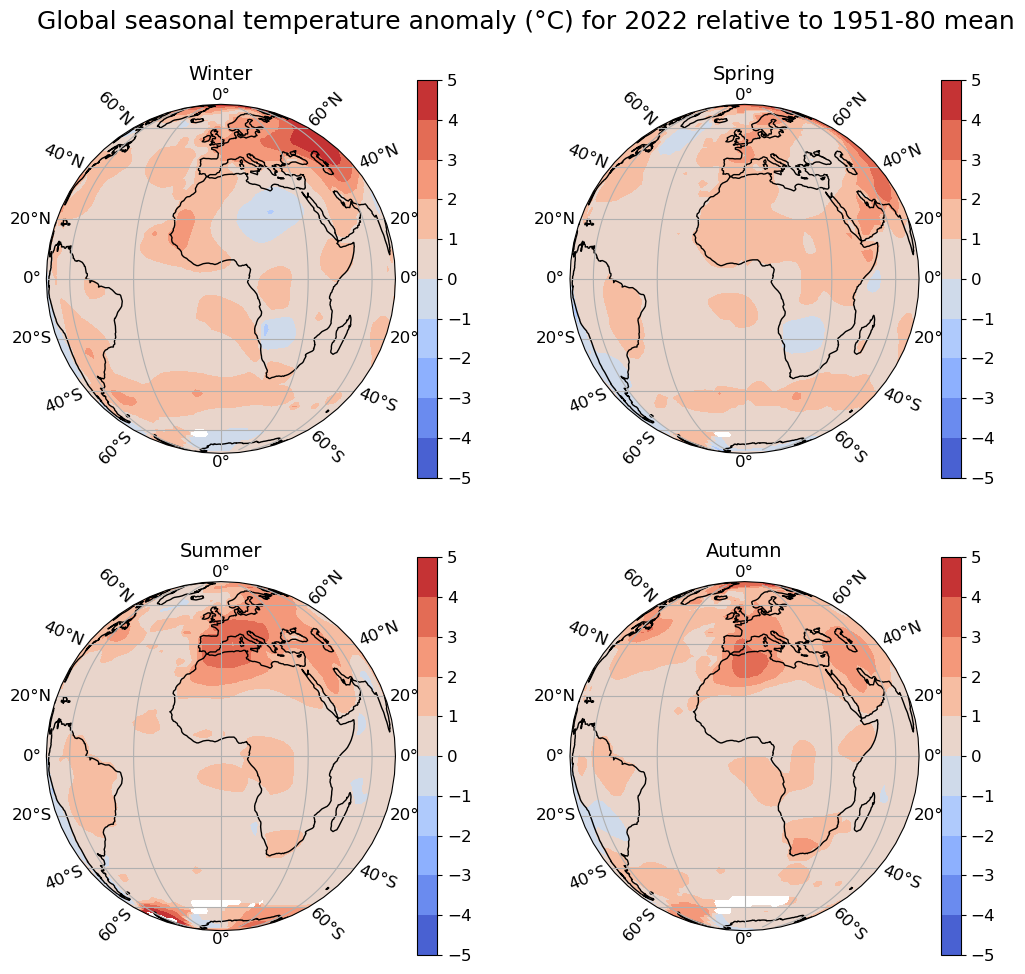

In [12]:
clevs = np.arange(-5, 6)
cmap = "coolwarm"
#projection = ccrs.Orthographic(central_latitude= 90, central_longitude = 90)
projection = ccrs.Orthographic()

# Use subplot_kw to declare the projection
fig, axs = plt.subplots(2, 2, figsize = (24, 7), subplot_kw = {"projection": projection},
                       )
plt.subplots_adjust(left = 0.3, right = 0.7, top = 1, bottom = -0.25)

fig.suptitle(title, x = 0.5, y = 1.1, fontsize = 18)


cf1 = axs[0, 0].contourf(winter_lons, winter_lats, 
             winter_temp_anomaly,
             clevs,
             transform = ccrs.PlateCarree(),
             cmap = cmap
            )
fig.colorbar(cf1, ax=axs[0, 0], ticks = clevs)

axs[0, 0].set_title('Winter', fontsize = 14)
axs[0, 0].coastlines()
axs[0, 0].gridlines(draw_labels=True)
axs[0, 0].set_aspect('equal', adjustable=None)



cf2 = axs[0, 1].contourf(spring_lons, spring_lats, 
             spring_temp_anomaly,
             clevs,
             transform = ccrs.PlateCarree(),
             cmap = cmap
            )
fig.colorbar(cf2, ax=axs[0, 1], ticks = clevs)
axs[0, 1].set_title('Spring', fontsize = 14)
axs[0, 1].coastlines()
axs[0, 1].gridlines(draw_labels=True)
axs[0, 1].set_aspect('equal', adjustable=None)


cf3 = axs[1, 0].contourf(summer_lons, summer_lats, 
             summer_temp_anomaly,
             clevs,
             transform = ccrs.PlateCarree(),
             cmap = cmap
            )
fig.colorbar(cf3, ax=axs[1, 0], ticks = clevs)
axs[1, 0].set_title('Summer', fontsize = 14)
axs[1, 0].coastlines()
axs[1, 0].gridlines(draw_labels=True)
axs[1, 0].set_aspect('equal', adjustable=None)


cf4 = axs[1, 1].contourf(autumn_lons, autumn_lats, 
             autumn_temp_anomaly,
             clevs,
             transform = ccrs.PlateCarree(),
             cmap = cmap
            )
fig.colorbar(cf4, ax=axs[1, 1], ticks = clevs)
axs[1, 1].set_title('Autumn', fontsize = 14)
axs[1, 1].coastlines()
axs[1, 1].gridlines(draw_labels=True)
axs[1, 1].set_aspect('equal', adjustable=None)



plt.show()